<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%207/boosting_or_bagging_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load Dataset**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# URL dataset dari CMU
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Membaca dataset
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Memisahkan fitur dan target
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Fitur
y = raw_df.values[1::2, 2]  # Target

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Load the uploaded datasets
automobile_df = pd.read_csv('/content/Automobile.csv')
boston_df = pd.read_csv(url,  header=None, names=boston_columns)
infrared_df = pd.read_csv('/content/Infrared.csv')

# Display the first few rows of each dataset
print('=============== AUTOMOBILE ===============')
print(automobile_df.head)
print()
print('=============== BOSTON HOUSE ===============')
print(boston_df.head)
print()
print('=============== INFRARED ===============')
print(infrared_df.head)


=============== AUTOMOBILE ===============
<bound method NDFrame.head of        price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0  

#**Processing and Training Dataset**

In [13]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

def preprocess_dataset(df, target_column):
    df = df.copy()
    df = df.dropna(subset=[target_column])  # buang baris tanpa target
    df = df.fillna(df.median(numeric_only=True))  # isi NaN dengan median

    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col])  # ubah kategori ke angka

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n========== {dataset_name.upper()} ==========")

    # Bagging
    bag_model = BaggingRegressor(random_state=42)
    bag_model.fit(X_train, y_train)
    y_pred_bag = bag_model.predict(X_test)

    # Boosting
    boost_model = GradientBoostingRegressor(random_state=42)
    boost_model.fit(X_train, y_train)
    y_pred_boost = boost_model.predict(X_test)

    # Evaluasi
    for name, y_pred in zip(["Bagging", "Boosting"], [y_pred_bag, y_pred_boost]):
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)
        print(f"\nModel: {name}")
        print(f"MSE : {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R²  : {r2:.2f}")


In [18]:
# Automobile dataset
X_train_a, X_test_a, y_train_a, y_test_a = preprocess_dataset(automobile_df, 'price')
train_and_evaluate(X_train_a, X_test_a, y_train_a, y_test_a, "Automobile")

# Boston dataset
X_train_b, X_test_b, y_train_b, y_test_b = preprocess_dataset(boston_df, 'medv')
train_and_evaluate(X_train_b, X_test_b, y_train_b, y_test_b, "Boston Housing")

# Infrared dataset
X_train_i, X_test_i, y_train_i, y_test_i = preprocess_dataset(infrared_df, 'aveOralM')
train_and_evaluate(X_train_i, X_test_i, y_train_i, y_test_i, "Infrared")



========== AUTOMOBILE ==========

Model: Bagging
MSE : 10053989.04
RMSE: 3170.80
R²  : 0.92

Model: Boosting
MSE : 5968222.37
RMSE: 2442.99
R²  : 0.95

========== BOSTON HOUSING ==========

Model: Bagging
MSE : 9.94
RMSE: 3.15
R²  : 0.86

Model: Boosting
MSE : 6.21
RMSE: 2.49
R²  : 0.92

========== INFRARED ==========

Model: Bagging
MSE : 0.07
RMSE: 0.26
R²  : 0.69

Model: Boosting
MSE : 0.05
RMSE: 0.22
R²  : 0.77


#**Penjelasan Matematika**


**MSE (Mean Squared Error)**

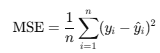

Penjelasan:

* 𝑦𝑖 : Nilai target aktual (asli).
* 𝑦^𝑖 : Nilai prediksi oleh model.
* 𝑛 : Jumlah data.

Mengukur rata-rata selisih kuadrat antara prediksi dan nilai aktual, semakin kecil MSE, semakin baik model.

**(RMSE) Root Mean Squared Error**

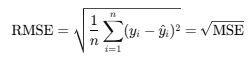

RMSE merupakan akar dari MSE
Memiliki satuan yang sama dengan nilai y, sehingga lebih mudah diinterpretasikan.


**R² (Koefisien Determinasi)**

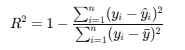

𝑦ˉ : Rata-rata dari semua nilai aktual.
mengukur seberapa baik model menjelasakan variasi dari data aktual. Saat nilai R^2 mendekati 1 berarti model sangat baik, namun saat nilai 0 berarti model tidak lebih baik dari prediksi rata-rata.